# Analysis of FITS Data Using Bayesian Blocks

This Jupyter Notebook demonstrates the analysis of FITS (Flexible Image Transport System) data using Bayesian Blocks. The notebook includes the following steps:

1. **Loading FITS Data**: We use the `astropy.io.fits` module to load data from FITS files.
2. **Histogram Plotting**: We plot histograms of the time data to visualize the distribution.
3. **Bayesian Blocks Calculation**: We apply the Bayesian Blocks algorithm to the time data to identify significant change points.
4. **Visualization**: We visualize the results of the Bayesian Blocks analysis, showing the count rates over time.

The notebook includes multiple examples with different FITS files to illustrate the process and results.

## Libraries Used
- `astropy.io.fits` for reading FITS files.
- `numpy` for numerical operations.
- `matplotlib.pyplot` for plotting.
- `astropy.stats.bayesian_blocks` for Bayesian Blocks algorithm.

Let's get started!

In [3]:
from astropy.io import fits
import numpy as np

def load_fits_data(filename):
    with fits.open(filename, memmap=True) as hdul:
        all_count_data = np.array(hdul[2].data)
    return all_count_data['TIME'].astype(float)

In [59]:
# Upload File
times = load_fits_data('Datasets/glg_tte_n6_bn200907957_v00.fit')

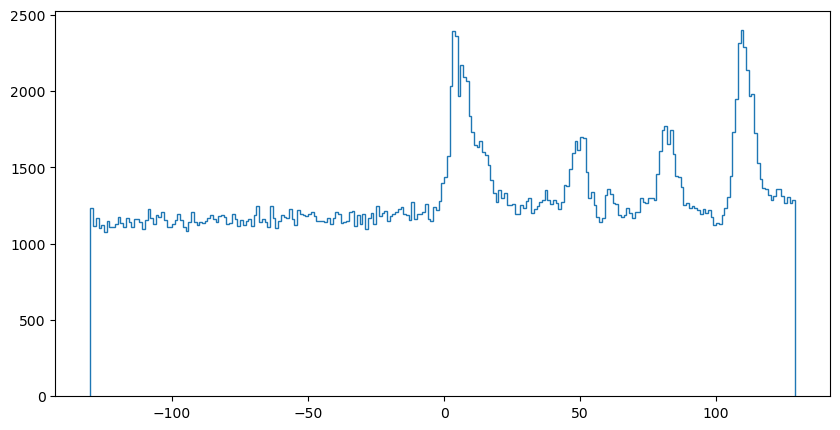

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bin_edges = np.arange(-130, 130, 1)
# #set ylim
# # plt.ylim(1000, 1350)
plt.hist(times, bins=bin_edges, histtype='step')
plt.show()

# Bayesian Blocks

In [15]:
from astropy.stats import bayesian_blocks
import numpy as np

def calculate_bayesian_blocks(time_array):
    """
    Calculate Bayesian Blocks for a given time array.
    Returns:
    tuple: edges, bin_widths, count_rates
    """
    # Apply Bayesian Blocks
    edges = bayesian_blocks(time_array)

    # Calculate the width of each bin
    bin_widths = np.diff(edges)

    # Calculate the counts in each bin
    counts, _ = np.histogram(time_array, bins=edges)

    # Calculate the count rate (counts per second) for each bin
    count_rates = counts / bin_widths

    return edges, bin_widths, count_rates

## Example 1

In [26]:
# Input File
time_array = load_fits_data('Datasets/glg_tte_n1_bn111220486_v00.fit')

In [16]:
edges, bin_widths, count_rates = calculate_bayesian_blocks(time_array)

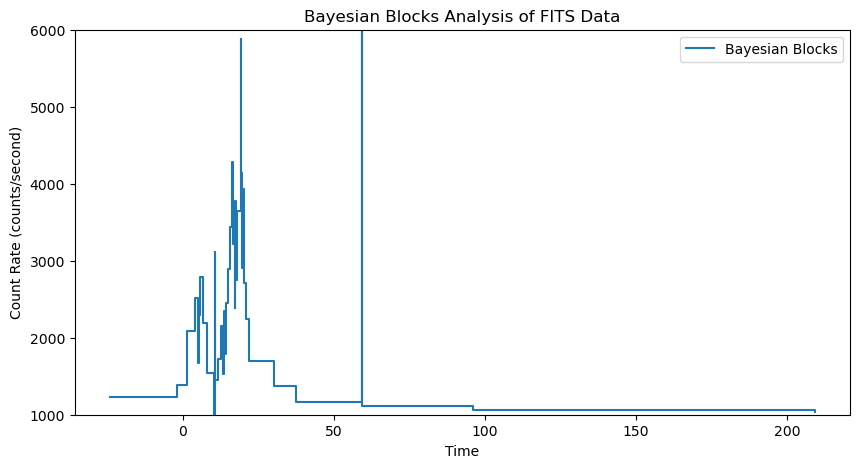

In [17]:
plt.figure(figsize=(10, 5))
plt.step(edges[:-1], count_rates, where='post', label='Bayesian Blocks')
plt.xlabel('Time')
plt.ylabel('Count Rate (counts/second)')
plt.title('Bayesian Blocks Analysis of FITS Data')
plt.legend()

# Set ylim if needed
plt.ylim(1000, 6000)

plt.show()

## Example 2

In [29]:
# Input File
time_array = load_fits_data('Datasets/glg_tte_n6_bn090510016_v00.fit')

In [30]:
edges, bin_widths, count_rates = calculate_bayesian_blocks(time_array)

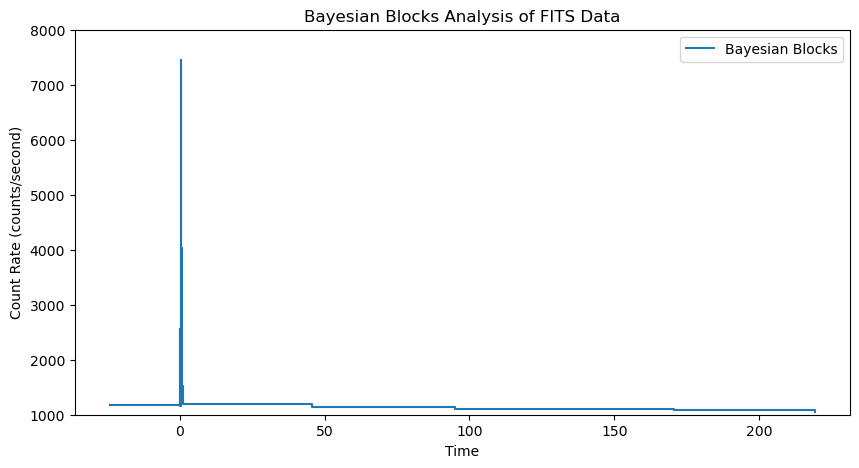

In [33]:
plt.figure(figsize=(10, 5))
plt.step(edges[:-1], count_rates, where='post', label='Bayesian Blocks')
plt.xlabel('Time')
plt.ylabel('Count Rate (counts/second)')
plt.title('Bayesian Blocks Analysis of FITS Data')
plt.legend()

# Set ylim if needed
plt.ylim(1000, 8000)

plt.show()

## Example 3

In [54]:
# Input File
time_array = load_fits_data('Datasets/glg_tte_n6_bn200907957_v00.fit')

In [55]:
edges, bin_widths, count_rates = calculate_bayesian_blocks(time_array)

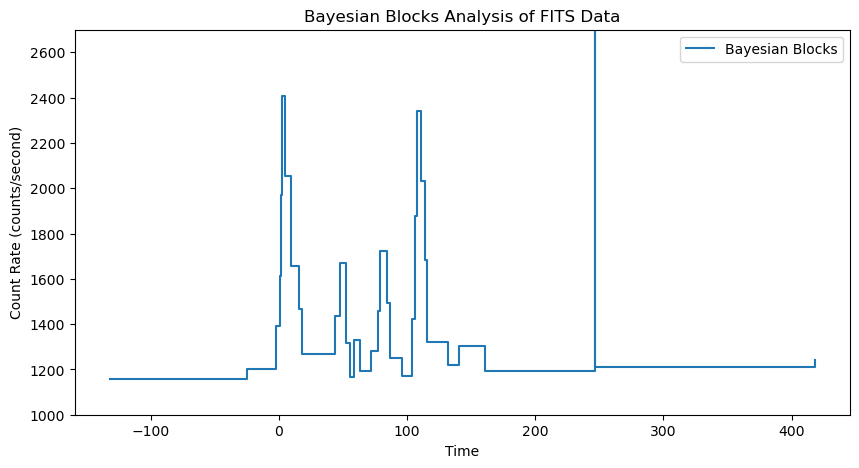

In [61]:
plt.figure(figsize=(10, 5))
plt.step(edges[:-1], count_rates, where='post', label='Bayesian Blocks')
plt.xlabel('Time')
plt.ylabel('Count Rate (counts/second)')
plt.title('Bayesian Blocks Analysis of FITS Data')
plt.legend()

# Set ylim if needed
plt.ylim(1000, 2700)

plt.show()

## Example 4

In [62]:
# Input File
time_array = load_fits_data('Datasets/glg_tte_n6_bn230428381_v00.fit')

In [63]:
edges, bin_widths, count_rates = calculate_bayesian_blocks(time_array)

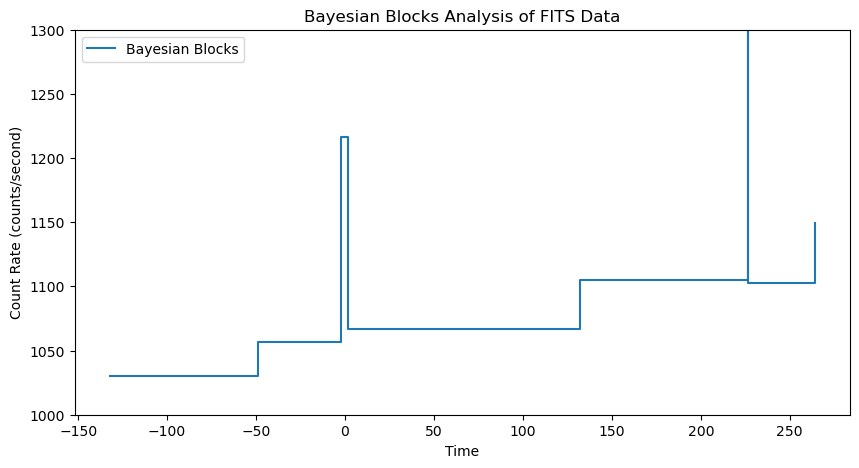

In [68]:
plt.figure(figsize=(10, 5))
plt.step(edges[:-1], count_rates, where='post', label='Bayesian Blocks')
plt.xlabel('Time')
plt.ylabel('Count Rate (counts/second)')
plt.title('Bayesian Blocks Analysis of FITS Data')
plt.legend()

# Set ylim if needed
plt.ylim(1000, 1300)

plt.show()

## Example 5

In [69]:
# Input File
time_array = load_fits_data('Datasets/glg_tte_n8_bn090719063_v00.fit')

In [70]:
time_array = times
edges, bin_widths, count_rates = calculate_bayesian_blocks(time_array)

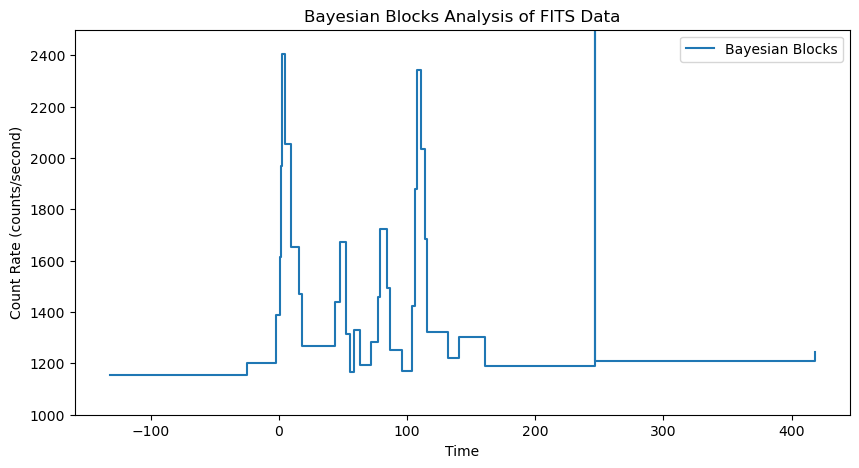

In [72]:
plt.figure(figsize=(10, 5))
plt.step(edges[:-1], count_rates, where='post', label='Bayesian Blocks')
plt.xlabel('Time')
plt.ylabel('Count Rate (counts/second)')
plt.title('Bayesian Blocks Analysis of FITS Data')
plt.legend()

# Set ylim if needed
plt.ylim(1000, 2500)

plt.show()